In [1]:
# Importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Impoting the dataset
data= pandas.read_csv('D:\Files\Data Science\Anaconda\Sample csv files\Mushrooms.csv')
# Shuffling dataset
data= data.sample(frac= 1)
# Shape of dataset
data.shape

(8124, 23)

In [3]:
# Names of columns in the dataframe
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
# Viewing 2 rows of dataframe
data.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5807,e,f,s,e,t,n,f,c,b,e,...,s,e,e,p,w,t,e,w,c,w
1386,e,f,f,n,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,s,g


In [5]:
# Checking null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# Checking duplicate values
data.duplicated().sum()

0

In [7]:
# Label encoding
for label in data.columns:
    data[label] = LabelEncoder().fit(data[label]).transform(data[label])

In [8]:
# Viewing 2 rows of dataframe
data.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5807,0,2,2,2,1,5,1,0,0,1,...,2,2,2,0,2,2,0,7,1,6
1386,0,2,0,4,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,3,1


In [9]:
# Number of unique values in dataframe
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [10]:
# Brief information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 5807 to 4639
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-nu

In [11]:
# Dividing dataframe into independant and dependant sets
features= ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
target= ['class']
x= data[features]
y= data[target]

In [12]:
# Dividing into training amd testing sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 1)
print('Training set shape : ', x_train.shape)
print('Testing set shape : ', x_test.shape)

Training set shape :  (6499, 22)
Testing set shape :  (1625, 22)


In [13]:
# Linear Regression
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
lr_accuracy= ( r2_score(y_test, y_pred) ) * 100
lr_accuracy1= lr_accuracy.round(decimals= 3)
print('Accuracy score with Linear Regression is : ', lr_accuracy1, '% .')

Accuracy score with Linear Regression is :  72.834 % .


In [14]:
# Decision tree classifier
dtc= DecisionTreeClassifier(criterion= 'entropy', max_depth= 1)
dtc.fit(x_train, y_train)
y_pred= dtc.predict(x_test)
dtc_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
dtc_accuracy1= dtc_accuracy.round(decimals= 3)
print('Accuracy score with Decision tree classifier is : ', dtc_accuracy1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

Accuracy score with Decision tree classifier is :  71.569 % .
Confusion matrix is :  
 [[814   0]
 [462 349]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       814
           1       1.00      0.43      0.60       811

    accuracy                           0.72      1625
   macro avg       0.82      0.72      0.69      1625
weighted avg       0.82      0.72      0.69      1625



In [15]:
# Ada boost Classifier
dtc= DecisionTreeClassifier(criterion= 'entropy', max_depth= 1)
ada_boost_classifier= AdaBoostClassifier(base_estimator= dtc, n_estimators= 5, learning_rate= 1)
ada_boost_classifier.fit(x_train, y_train)
y_pred= ada_boost_classifier.predict(x_test)
ada_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
ada_accuracy1= ada_accuracy.round(decimals= 3)
print('Accuracy score with Ada boost Classifier is : ', ada_accuracy1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

Accuracy score with Ada boost Classifier is :  91.508 % .
Confusion matrix is :  
 [[774  40]
 [ 98 713]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       814
           1       0.95      0.88      0.91       811

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.91      1625
weighted avg       0.92      0.92      0.91      1625



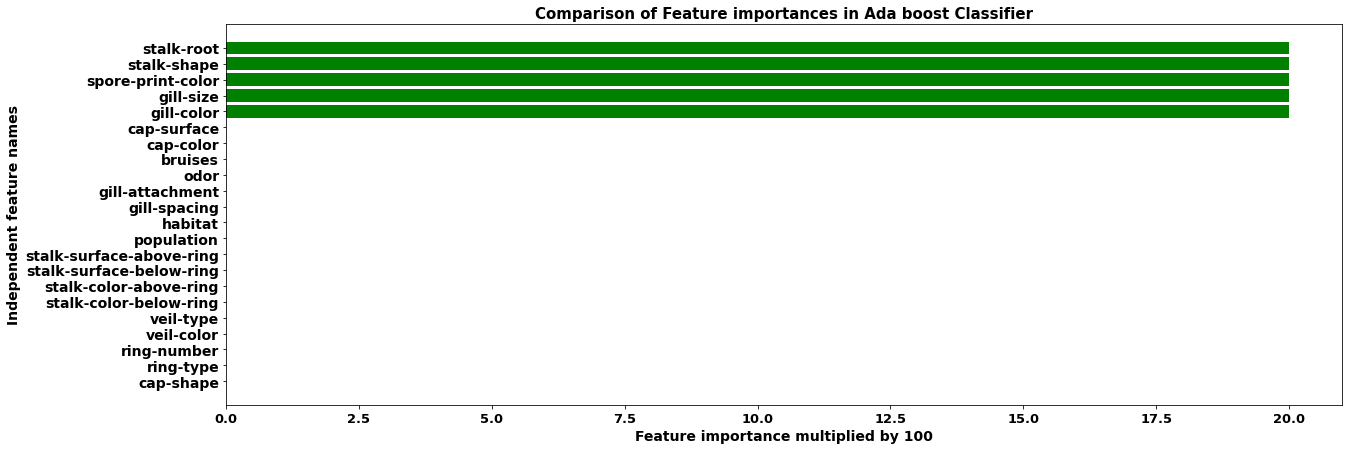

In [16]:
# Feature importances in Ada boost Classifier for independent set 'x' :
plt.figure(figsize= (20, 7))
model= ada_boost_classifier.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'green')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in Ada boost Classifier', fontsize= 15, fontweight= 'bold')
plt.show()

In [17]:
# Gradient Boosting Regressor
gradient_boosting_regressor= GradientBoostingRegressor(max_depth= 2,  n_estimators= 5, learning_rate= 1 )
gradient_boosting_regressor.fit(x_train, y_train)
y_pred= gradient_boosting_regressor.predict(x_test)
gbr_accuracy= ( r2_score(y_test, y_pred) ) * 100
gbr_accuracy1= gbr_accuracy.round(decimals= 3)
print('Accuracy score with Gradient Boosting Regressor is : ', gbr_accuracy1, '% .')

Accuracy score with Gradient Boosting Regressor is :  86.573 % .


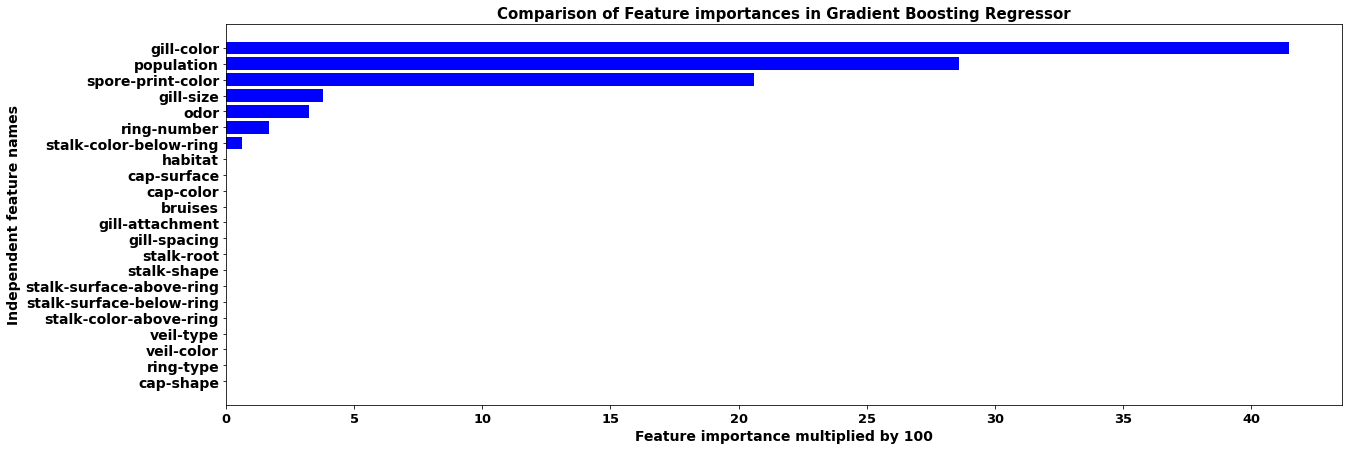

In [18]:
# Feature importances in Gradient Boosting Regressor for independent set 'x' :
plt.figure(figsize= (20, 7))
model= gradient_boosting_regressor.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'blue')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in Gradient Boosting Regressor', fontsize= 15, fontweight= 'bold')
plt.show()

In [19]:
# Gradient Boosting Classifier
gradient_boosting_classifier= GradientBoostingClassifier(max_depth= 2,  n_estimators= 5, learning_rate= 1 )
gradient_boosting_classifier.fit(x_train, y_train)
y_pred= gradient_boosting_classifier.predict(x_test)
gbc_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
gbc_accuracy1= gbc_accuracy.round(decimals= 3)
print('Accuracy score with Gradient Boosting Classifier is : ', gbc_accuracy1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

Accuracy score with Gradient Boosting Classifier is :  97.969 % .
Confusion matrix is :  
 [[799  15]
 [ 18 793]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       814
           1       0.98      0.98      0.98       811

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



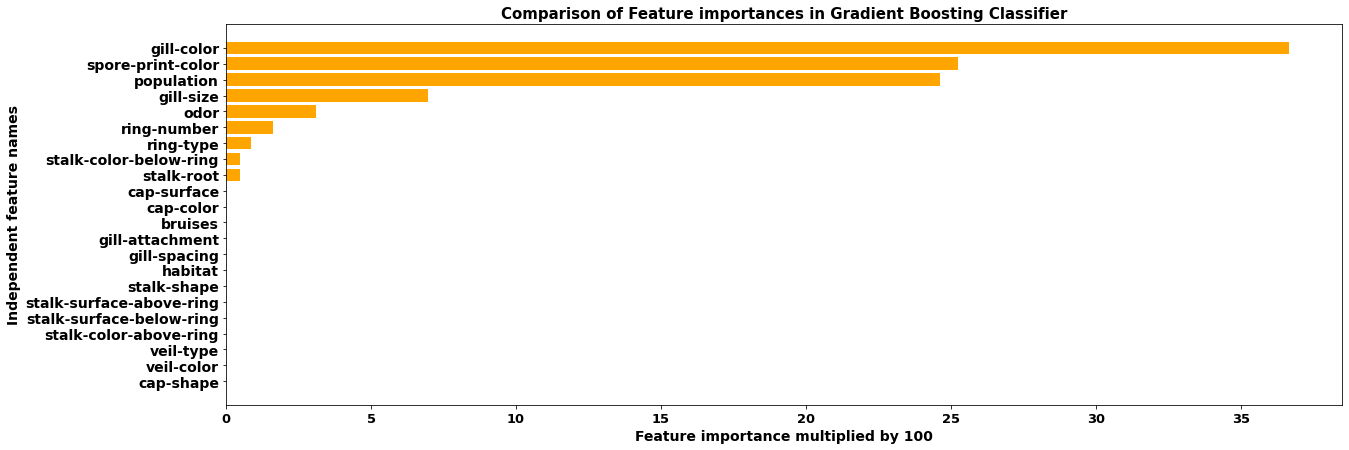

In [20]:
# Feature importances in Gradient Boosting Classifier for independent set 'x' :
plt.figure(figsize= (20, 7))
model= gradient_boosting_classifier.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'orange')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in Gradient Boosting Classifier', fontsize= 15, fontweight= 'bold')
plt.show()

In [21]:
# XG Boost Classifier
xg_b_classifier= XGBClassifier(max_depth= 2,  n_estimators= 5, learning_rate= 1 )
xg_b_classifier.fit(x_train, y_train)
y_pred= xg_b_classifier.predict(x_test)
xgb_accuracy= ( accuracy_score(y_test, y_pred) ) * 100
xgb_accuracy1= xgb_accuracy.round(decimals= 3)
print('Accuracy score with XG Boost Classifier is : ', xgb_accuracy1, '% .')
print('Confusion matrix is : ','\n',confusion_matrix(y_test, y_pred))
print('Classification report is : ','\n',classification_report(y_test, y_pred))

[11:43:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score with XG Boost Classifier is :  97.231 % .
Confusion matrix is :  
 [[799  15]
 [ 30 781]]
Classification report is :  
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       814
           1       0.98      0.96      0.97       811

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



[11:43:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


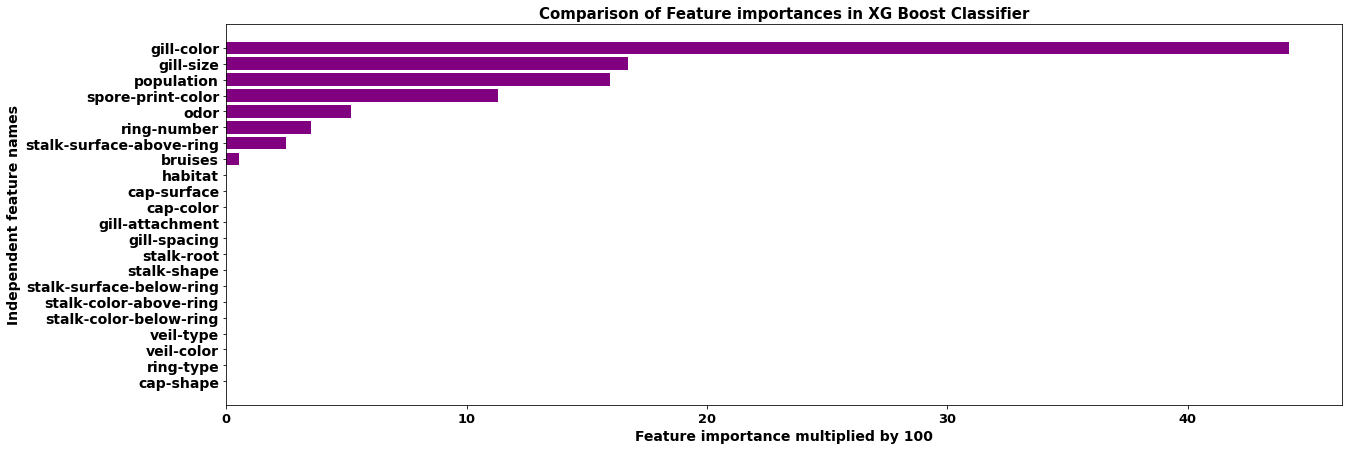

In [22]:
# Feature importances in XG Boost Classifier for independent set 'x' :
plt.figure(figsize= (20, 7))
model= xg_b_classifier.fit(x_train, y_train)
feature_importance= model.feature_importances_
feature_importance= feature_importance * 100
sorted_index= numpy.argsort(feature_importance)
plt.barh(numpy.arange(22), feature_importance[sorted_index], color= 'purple')
plt.yticks(numpy.arange(22), x.columns[sorted_index], fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Feature importance multiplied by 100', fontsize= 14, fontweight= 'bold')
plt.ylabel('Independent feature names', fontsize= 14, fontweight= 'bold')
plt.title('Comparison of Feature importances in XG Boost Classifier', fontsize= 15, fontweight= 'bold')
plt.show()

In [23]:
# Comparing different classifiers
df= pandas.DataFrame({'Classifier names': ['Linear Regression', 'Decision tree classifier', 'Ada boost Classifier',
                                           'Gradient Boosting Regressor', 'Gradient Boosting Classifier',
                                           'XG Boost Classifier'], 'Accuracy scores': [lr_accuracy1, dtc_accuracy1,
                                                                                      ada_accuracy1, gbr_accuracy1,
                                                                                      gbc_accuracy1, xgb_accuracy1]})
df

,Classifier names,Accuracy scores
0,Linear Regression,72.834
1,Decision tree classifier,71.569
2,Ada boost Classifier,91.508
3,Gradient Boosting Regressor,86.573
4,Gradient Boosting Classifier,97.969
5,XG Boost Classifier,97.231


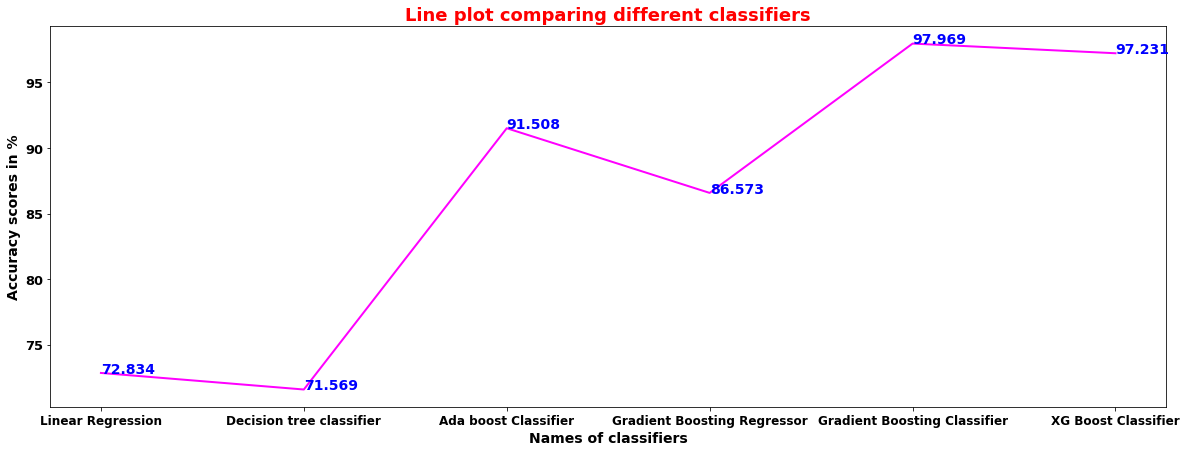

In [24]:
# Line plot
plt.figure(figsize= (20, 7))
plt.plot(df['Classifier names'], df['Accuracy scores'], color= 'magenta', linewidth= 2)
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Names of classifiers', fontsize= 14, fontweight= 'bold')
plt.ylabel('Accuracy scores in %', fontsize= 14, fontweight= 'bold')
plt.title('Line plot comparing different classifiers', fontsize= 18, fontweight= 'bold', color= 'Red' )
for x, y in zip(df['Classifier names'], df['Accuracy scores']):
                plt.text(x, y, str(y), fontsize= 14, fontweight= 'bold', color= 'blue')
plt.show()

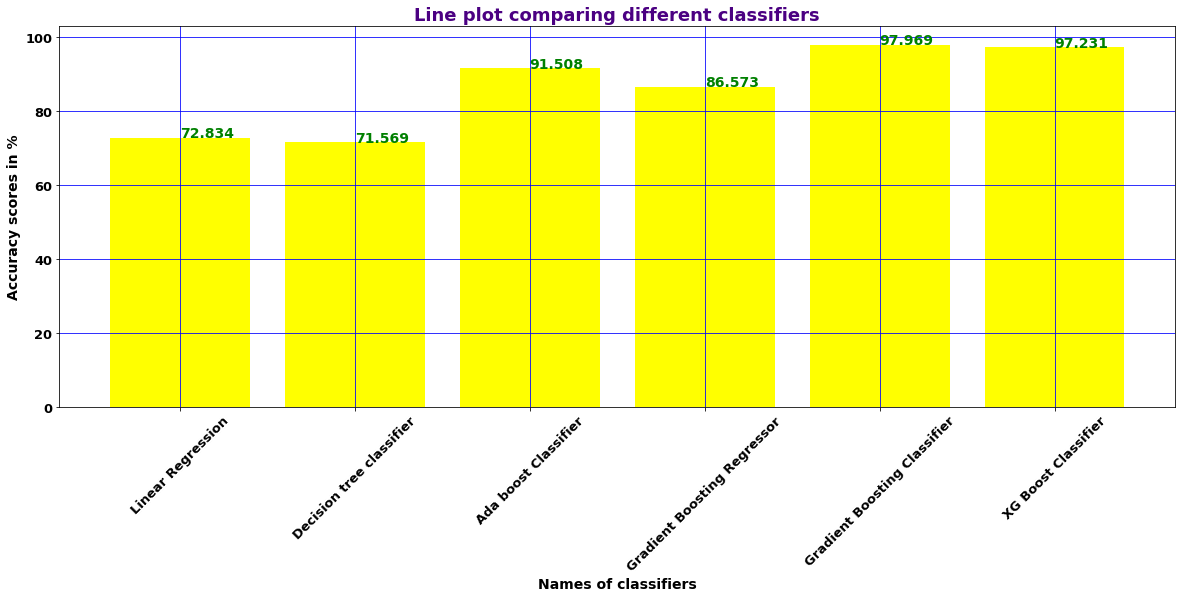

In [25]:
# Bar plot
plt.figure(figsize= (20, 7))
plt.bar(df['Classifier names'], df['Accuracy scores'], color= 'yellow', linewidth= 2)
plt.xticks(fontsize= 13, fontweight= 'bold', rotation= 45)
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.xlabel('Names of classifiers', fontsize= 14, fontweight= 'bold')
plt.ylabel('Accuracy scores in %', fontsize= 14, fontweight= 'bold')
plt.title('Line plot comparing different classifiers', fontsize= 18, fontweight= 'bold', color= 'indigo' )
for x, y in zip(df['Classifier names'], df['Accuracy scores']):
                plt.text(x, y, str(y), fontsize= 14, fontweight= 'bold', color= 'green')
plt.grid(color= 'blue')
plt.show()

# I am getting highest accuracy for Gradient Boosting Classifier .